**Methods Used**
<li>Multiple Linear Regression<\li>
<li>Polynomial Regression<\li>
<li>Regularization : Ridge(L2),Lasso(L1),ElasticNet<\li>

In [1]:
# libraries for dataframes & array handling
import pandas as pd
import numpy as np

# libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
sns.set_theme(style='darkgrid', palette='inferno')

# library to ignore warnings that arise during visualizations
import warnings
warnings.filterwarnings('ignore')

In [2]:
# SKLEARN CLASSES & LIBRARIES

# importing train test split & GridSearchCV (for performing grid search on various model parmeters)
from sklearn.model_selection import train_test_split, GridSearchCV

# import StandarScaler for data Standardization
from sklearn.preprocessing import StandardScaler

# importing linear regression, polynomial regression, Regulariation classes (Ridge, Lasso, ElasticNet)
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

# importing model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, SCORERS

In [3]:
budget_df = pd.read_csv('/kaggle/input/sales-and-advertising-budget-dataset/SalesAdvertisingBudgetDataSet.csv', index_col=0)
budget_df.head(10)

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


**Exploratory Data Analysis**¶

In [4]:
# renaming all the columns for ease of use
budget_df.rename({'TV Ad Budget ($)':'TV',
           'Radio Ad Budget ($)':'RADIO',
           'Newspaper Ad Budget ($)':'NEWSPAPER',
           'Sales ($)':'SALES'},axis=1, inplace=True)

In [5]:
# getting basic data info

budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   RADIO      200 non-null    float64
 2   NEWSPAPER  200 non-null    float64
 3   SALES      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
# getting count, mean, standrad-deviation, minimum, percentile, and max statisics of data
budget_df.describe().round(1)

,TV,RADIO,NEWSPAPER,SALES
count,200.0,200.0,200.0,200.0
mean,147.0,23.3,30.6,14.0
std,85.9,14.8,21.8,5.2
min,0.7,0.0,0.3,1.6
25%,74.4,10.0,12.8,10.4
50%,149.8,22.9,25.8,12.9
75%,218.8,36.5,45.1,17.4
max,296.4,49.6,114.0,27.0


In [7]:
# tuple representing the dimensionality (rows & columns) of the budget & sales dataframe
shape = budget_df.shape
print("(Rows, Columns)",shape)

(Rows, Columns) (200, 4)


In [8]:
# checking for null vlaues
budget_df.isna().sum()

TV           0
RADIO        0
NEWSPAPER    0
SALES        0
dtype: int64

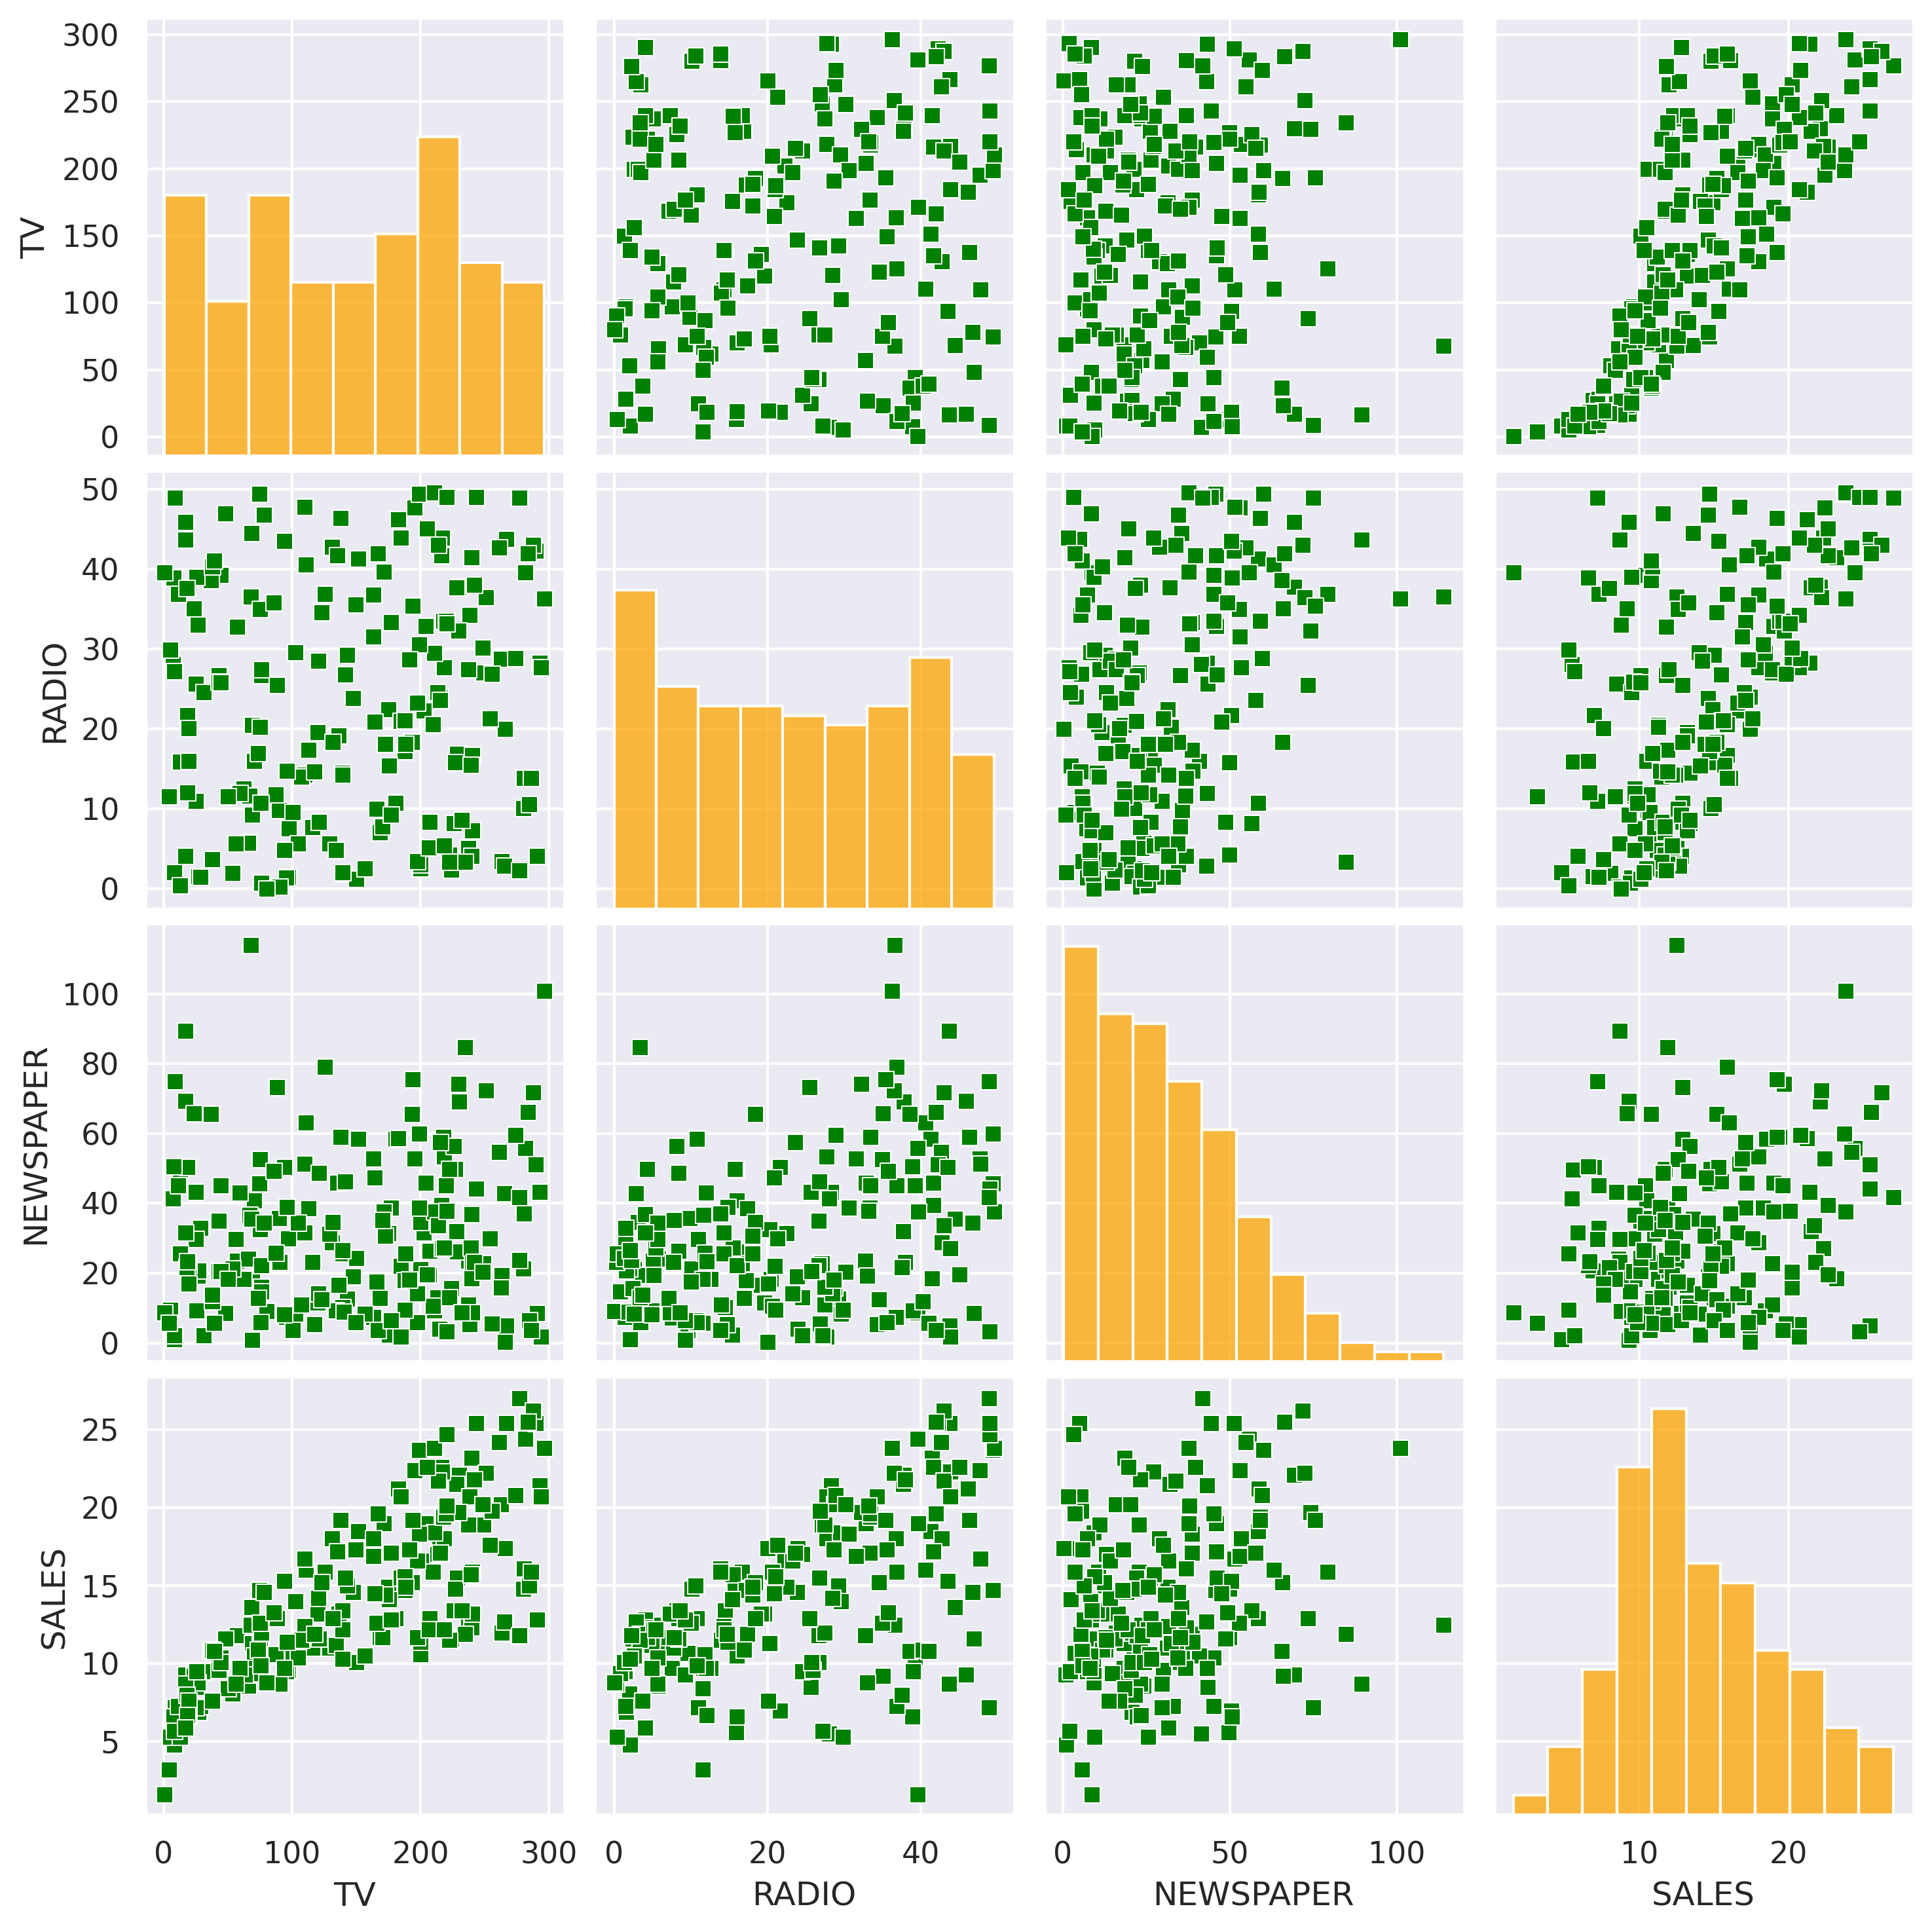

In [9]:
# Creating a pair plot to visualize realtionship between all the 
# columns at once. The pairplot function creates a grid of Axes 
# such that each variable in data will by shared in the y-axis 
# across a single row and in the x-axis across a single column. 
sns.pairplot(budget_df, plot_kws = {'color': 'green', 'marker': 's'},
             diag_kws = {'color': 'orange'})

Since we need to predict the sales based on the advertising budget on TV, Radio and Newspaper media, we checked the correlation between variables and the sales column and found the following:

* A high correlation between TV media budget & the Sales
* A moderate correlation between Radio ad media budget & the Sales
* A very low correlation between Newspaper ad media budget & the sales
* The data seems to be sort of normally distributed

                 TV     RADIO  NEWSPAPER     SALES
TV         1.000000  0.054809   0.056648  0.782224
RADIO      0.054809  1.000000   0.354104  0.576223
NEWSPAPER  0.056648  0.354104   1.000000  0.228299
SALES      0.782224  0.576223   0.228299  1.000000


<Axes: >

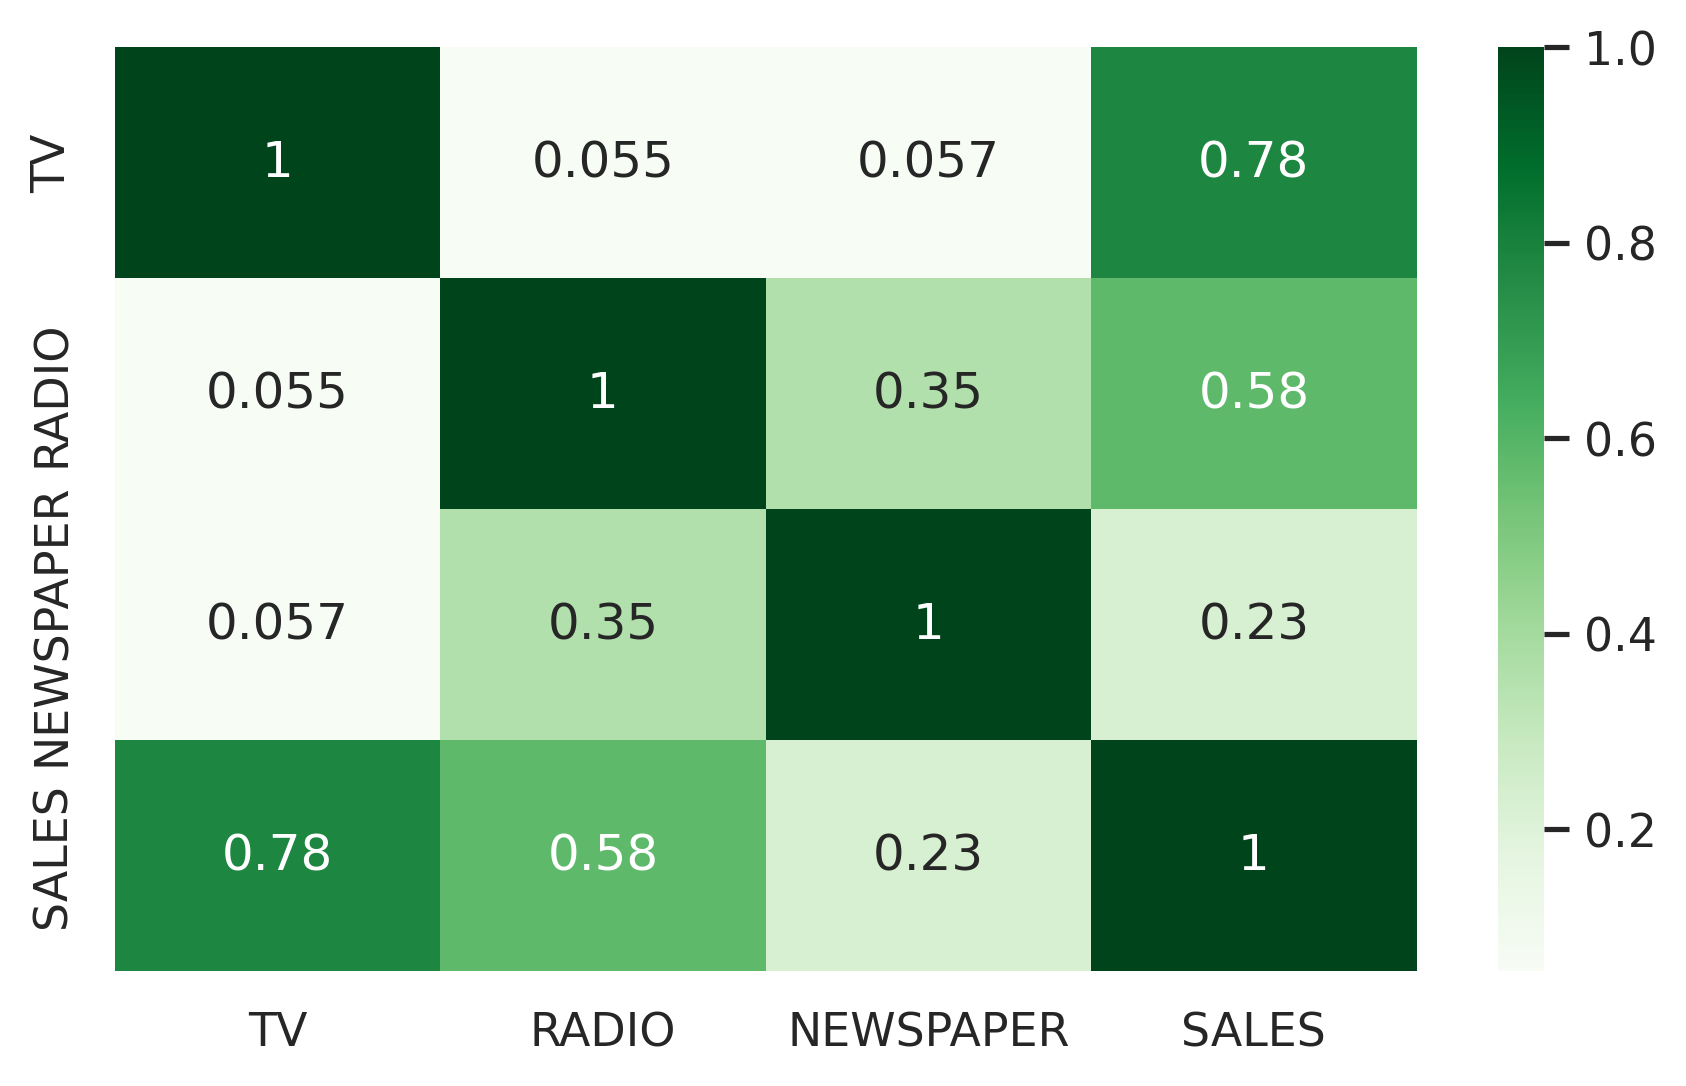

In [10]:
# Checking for correlation by displaying the correlation between multiple variables as a color-coded matrix.Checking for correlation by displaying the correlation between multiple variables as a color-coded matrix.
print(budget_df.corr())
sns.heatmap(budget_df.corr(),annot=True,cmap="Greens")

**Multiple linear regression** (MLR) is a statistical technique that uses two or more independent variables (features) to estimate a target variable Goal - To predict the outcome of a dependent variable.

In [11]:
# splititng data into features (x) & target(y) by droping target column
x_features = budget_df.drop('SALES',axis = 1)
y_target = budget_df['SALES']

# split our data into an x-features (which contains the data that we 
# will use to make predictions) and a y_target (which contains the 
# data that we are trying to predict).
# we want our test data to be 30% of the entire data set. Train test 
# split of target & features of dataset into subsets that minimize the potential for bias in your evaluation and validation process
x_train,x_test, y_train, y_test = train_test_split(x_features,y_target,test_size=0.3,random_state=42)

In [12]:
len(x_train),len(y_train),len(x_test),len(y_test)

(140, 140, 60, 60)

In [13]:
# creating an instannce of lineaar model from Linear Regression Class
linear_model = LinearRegression()

In [14]:
# Train the linear model on training data
linear_model.fit(x_train, y_train)

# examine each of the model’s coefficients
pd.DataFrame(linear_model.coef_, x_features.columns, columns = ['Coeff'])

,Coeff
TV,0.044059
RADIO,0.199287
NEWSPAPER,0.006882


(array([ 1.,  1.,  4.,  2.,  6.,  3., 10., 17., 10.,  6.]),
 array([-6.15360735, -5.23188346, -4.31015957, -3.38843568, -2.46671179,
        -1.5449879 , -0.62326401,  0.29845988,  1.22018377,  2.14190766,
         3.06363155]),
 <BarContainer object of 10 artists>)

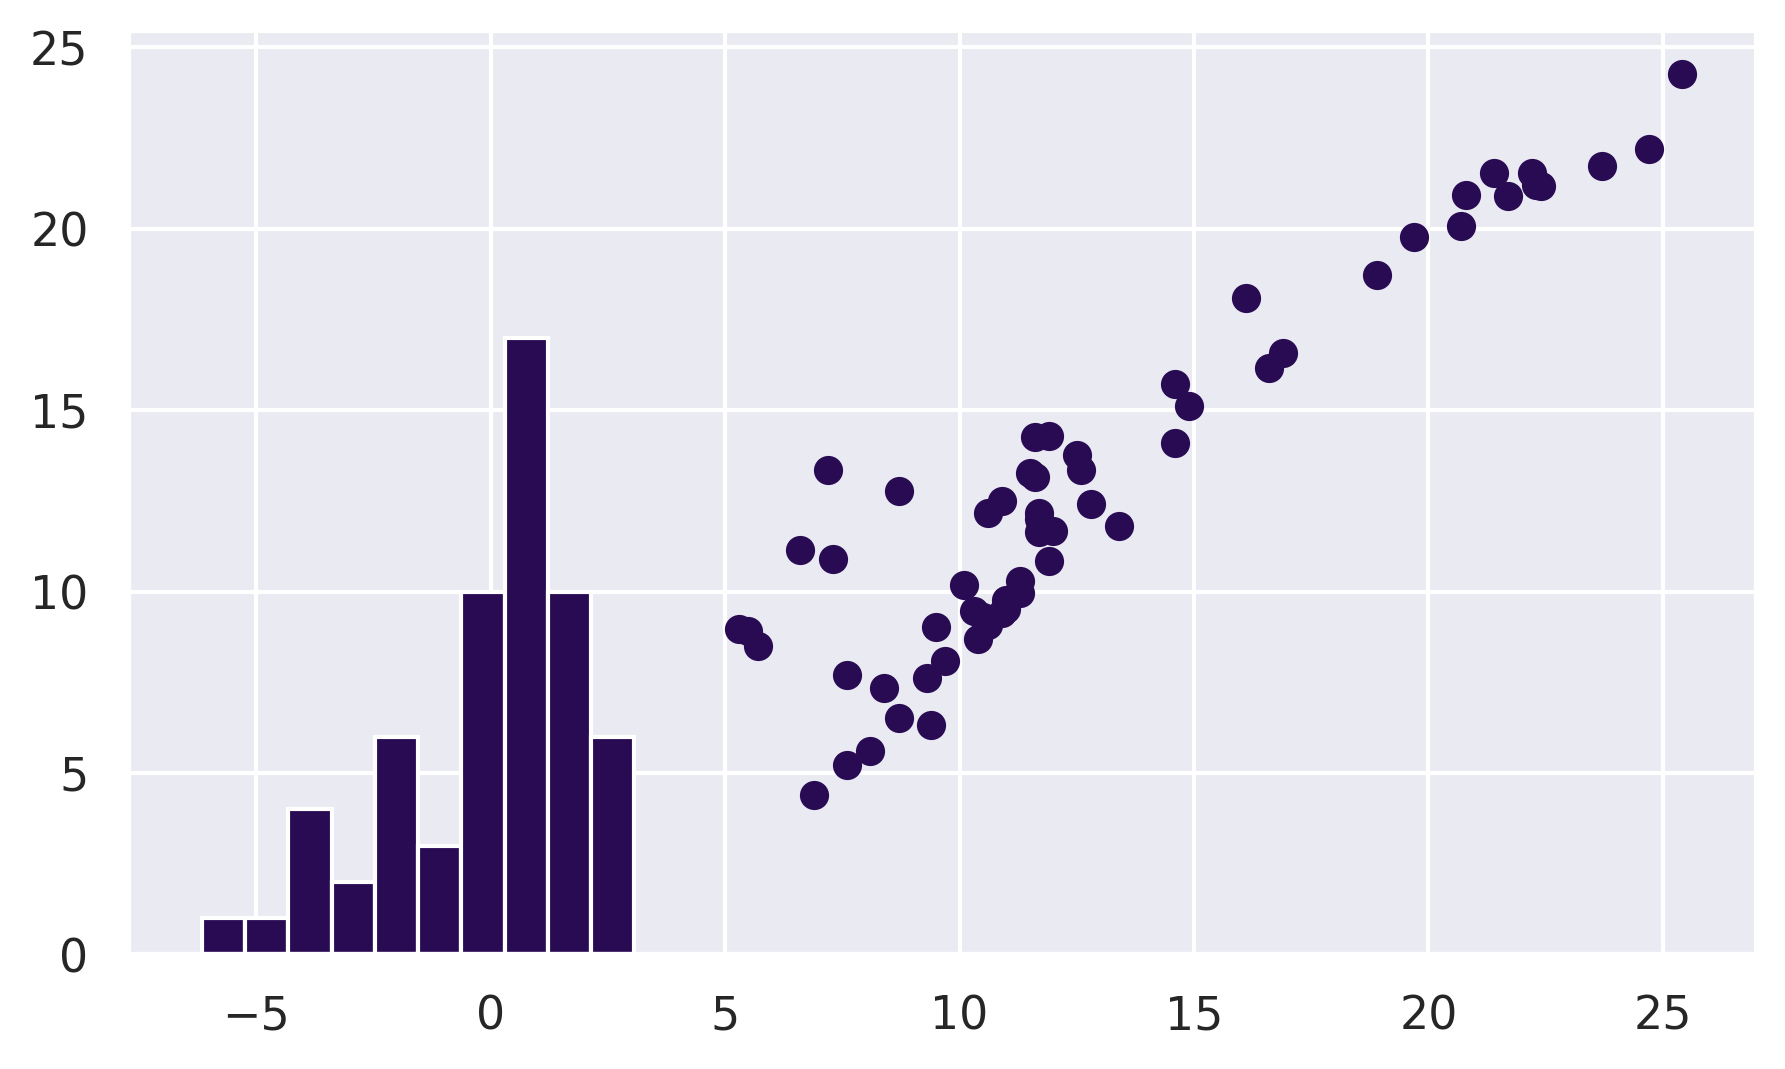

In [15]:
# making predictions on test data using trained model
linear_predict = linear_model.predict(x_test)

# checking predicted values. predicted values are very close to the 
# actual values for the observations in the data set. 
# A perfectly straight diagonal line in this scatterplot would 
# indicate that our model perfectly predicted the y-test values.
linear_predict
plt.scatter(y_test, linear_predict)

# Another way visually assess the performance of our model is to plot 
# its residuals. residuals from our learning model appear to be 
# normally distributed.
plt.hist(y_test - linear_predict)


In [16]:
# Testing the Performance of our Model by using various evaluation 
# metrics (it compares actual y_test and predicted values)

linear_MAE = mean_absolute_error(y_test, linear_predict)
linear_MSE = mean_squared_error(y_test, linear_predict)
linear_RMSE = np.sqrt(mean_squared_error(y_test, linear_predict)) # root mean sqaured error
linear_R2 = r2_score(y_test, linear_predict)

print('===============Linear Regression======================')
print('Mean absolute error : ',linear_MAE)
print('Mean squared error : ',linear_MSE)
print('Root Mean Squared error : ',linear_RMSE)
print('Accuracy : ',linear_R2*100)

===============Linear Regression======================
Mean absolute error :  1.5116692224549086
Mean squared error :  3.79679723671522
Root Mean Squared error :  1.9485372043446387
Accuracy :  86.09466508230368


**Polynomial Regression**
polynomial regression is used to improve our regression model by considering higher order relationship between features

In [17]:
# creating polynomial & fitting of features with degree 2 
# here bias is the colum of 1's as x to power 0 = 1, to elemate bias we keep include bias = false
# as there are multiple features the dataset will also contain interaction between features (X1+X2,X2+X3, X1+X3)

x_poly = budget_df.drop('SALES',axis = 1)
y_poly = budget_df['SALES']
poly_convert = PolynomialFeatures(degree=2, include_bias=False)
poly_transfrom = poly_convert.fit_transform(x_poly)

In [18]:
# shape of our new dataset is 200 rows by 9 columns 
# columns are as follows(x1, x2, x3,x1 squared, x2 squared, x3 squared, x1+x2, x2+x3, x1+x3)
poly_transfrom.shape

(200, 9)

In [19]:
# creating a train test split on our polynomial data
x_train,x_test, y_train, y_test = train_test_split(poly_transfrom,y_poly,test_size=0.3,random_state=42)

In [20]:
# creating a linear regression model instance from its class

poly_model = LinearRegression()

In [21]:
# training linear regression model on our polynomial data

poly_model.fit(x_train,y_train)

LinearRegression()

In [22]:
# making predctions on x test data using trained polynomial model
poly_predict = poly_model.predict(x_test)

In [23]:
# checking model coefficients 
poly_model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [24]:
# checking model intercept
poly_model.intercept_

4.718521645342706

In [25]:
# checking model performance by using various evaluation metrics 
# (it compares actual y_test and predicted values)

poly_MAE = mean_absolute_error(y_test, poly_predict)
poly_MSE = mean_squared_error(y_test, poly_predict)
poly_RMSE = np.sqrt(mean_squared_error(y_test, poly_predict)) # root mean sqaured error
poly_R2 = r2_score(y_test, poly_predict)

print('=================Polynomial Regression==================')
print('Mean absolute error : ',poly_MAE)
print('Mean squared error : ',poly_MSE)
print('Root Mean Squared error : ',poly_RMSE)
print('Accuracy : ',poly_R2*100)

=================Polynomial Regression==================
Mean absolute error :  0.5905974833808105
Mean squared error :  0.52319449490555
Root Mean Squared error :  0.7233218473857609
Accuracy :  98.0838600996637


**Regularization**
*The main goal of regularization is to balance the fit between training data to avoid overfitting, regularization is used to minimize model complexity, penalize loss function that has a higher slope, it reduce overfitting (it adds more bias to reduce model variance) 
**Ridge **- it simply adds more bias to reduce slop value
**lasso** - adds penalty equal to slop & limits the size of coeffcients, it perfroms variable selection by forcing some coeffcients exactly = 0 when tuning parameter is sufficiently large
**ElasticNet** - combination of Ridge (reduction of overfitting) & Lasso (feature selection)

**Ridge Regression**

In [26]:
# we use polynomial featues for Regularization for btter understanding

In [27]:
# scaling data 
sc = StandardScaler()
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

In [28]:
# checking various scoring metrics
# we can use these scoring keys to check for best performing model based on specified scores
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [29]:
# creating ridge model & setting its hyperparameters
ridge_model = RidgeCV(alphas=(0.1,1,10),scoring='neg_mean_absolute_error', cv = 5)

In [30]:
ridge_model.fit(scaled_x_train, y_train)

RidgeCV(alphas=(0.1, 1, 10), cv=5, scoring='neg_mean_absolute_error')

In [31]:
# best performing alpha value
ridge_model.alpha_

1.0

In [32]:
# predict method automatically fit predictions on best performing parameters
ridge_predict = ridge_model.predict(scaled_x_test)

In [33]:
# checking model performance by using various evaluation metrics 
# (it compares actual y_test and predicted values)

ridge_MAE = mean_absolute_error(y_test, ridge_predict)
ridge_MSE = mean_squared_error(y_test, ridge_predict)
ridge_RMSE = np.sqrt(mean_squared_error(y_test, ridge_predict)) # root mean sqaured error
ridge_R2 = r2_score(y_test, ridge_predict)

print('================Ridge Regression===============')
print('Mean absolute error : ',ridge_MAE)
print('Mean squared error : ',ridge_MSE)
print('Root Mean Squared error : ',ridge_RMSE)
print('Accuracy : ',ridge_R2*100)

================Ridge Regression===============
Mean absolute error :  0.5582981374678166
Mean squared error :  0.4857070381568478
Root Mean Squared error :  0.6969268528022491
Accuracy :  98.22115361543605


**Lasso Regression**
In LassoCV we set various values of alpha and the model runs on all the passed values of alpha and fits on the best-performing alpha value based on the passed scoring method

In [34]:
# eps - stands for epsilon and is used to set a stopping criterion for the algorithm. 
# In practical terms, "eps" controls how close the algorithm should get to the optimal solution 
# before terminating. 
# Smaller values of "eps" lead to more accurate solutions 
# alpha = List of alphas where to compute the models
# cv = Determines the cross-validation splitting strategy (For int/None inputs, KFold is used.)

lasso_model = LassoCV(eps = 0.01,n_alphas=100,cv = 5)

In [35]:
lasso_model.fit(scaled_x_train, y_train)

LassoCV(cv=5, eps=0.01)

In [36]:
# as we set value of aplhas - 100 model checked performance on 100 values of aplha
len(lasso_model.alphas_)

100

In [37]:
# best performing alpha value
lasso_model.alphas_

array([4.92453181, 4.70070424, 4.48704997, 4.28310663, 4.08843282,
       3.90260724, 3.72522772, 3.55591037, 3.39428875, 3.24001309,
       3.0927495 , 2.95217926, 2.81799815, 2.68991579, 2.56765497,
       2.45095108, 2.33955157, 2.23321535, 2.13171226, 2.03482265,
       1.94233682, 1.85405461, 1.76978497, 1.68934551, 1.61256215,
       1.53926871, 1.46930657, 1.40252432, 1.33877743, 1.27792793,
       1.21984413, 1.16440033, 1.11147654, 1.06095822, 1.01273603,
       0.96670561, 0.92276735, 0.88082615, 0.84079124, 0.80257598,
       0.76609767, 0.73127734, 0.69803966, 0.66631268, 0.63602774,
       0.6071193 , 0.57952479, 0.55318449, 0.5280414 , 0.50404111,
       0.48113166, 0.45926348, 0.43838925, 0.41846378, 0.39944396,
       0.38128861, 0.36395846, 0.34741598, 0.33162539, 0.31655251,
       0.30216471, 0.28843085, 0.27532123, 0.26280745, 0.25086245,
       0.23946036, 0.22857652, 0.21818736, 0.20827041, 0.1988042 ,
       0.18976824, 0.18114298, 0.17290975, 0.16505074, 0.15754

In [38]:
# lassoCV forces some of coeff to be exactly = 0 when tuning parameters is sifficiently large
# due to which variable selection becomes easy
lasso_model.coef_

array([ 2.84952614,  0.4601795 ,  0.        , -1.28407061,  3.45700747,
       -0.        ,  0.02987617,  0.10584147,  0.        ])

In [39]:
# best perfroming alpha vlaue
lasso_model.alpha_

0.04924531806474871

In [40]:
lasso_prdict = lasso_model.predict(scaled_x_test)

In [41]:
# checking model performance by using various evaluation metrics 
# (it compares actual y_test and predicted values)

lasso_MAE = mean_absolute_error(y_test, lasso_prdict)
lasso_MSE = mean_squared_error(y_test, lasso_prdict)
lasso_RMSE = np.sqrt(mean_squared_error(y_test, lasso_prdict)) # root mean sqaured error
lasso_R2 = r2_score(y_test, lasso_prdict)

print('===========Ridge Regression================')
print('Mean absolute error : ',lasso_MAE)
print('Mean squared error : ',lasso_MSE)
print('Root Mean Squared error : ',lasso_RMSE)
print('Accuracy : ',lasso_R2*100)

===========Ridge Regression================
Mean absolute error :  0.5285409080907807
Mean squared error :  0.4960638576693697
Root Mean Squared error :  0.7043180089060408
Accuracy :  98.18322295045054


**ElasticNet**

In [42]:
# creating a elssticnet model from its instance
# l1_ratio is ratio of weightage lasso regression to ridge regression
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],eps = 0.001,n_alphas=100, cv =5)

In [43]:
# training the model
elastic_model.fit(scaled_x_train,y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [44]:
# best perfroming ratio of l1
elastic_model.l1_ratio_

0.95

In [45]:
elastic_model.coef_

array([ 4.35979063,  0.23956511,  0.19157524, -2.63405535,  3.55356572,
       -0.41823125,  0.17873115,  0.17717911,  0.10049184])

In [46]:
elastic_predict = elastic_model.predict(scaled_x_test)

In [47]:
# checking model performance by using various evaluation metrics 
# (it compares actual y_test and predicted values)

elastic_MAE = mean_absolute_error(y_test, elastic_predict)
elastic_MSE = mean_squared_error(y_test, elastic_predict)
elastic_RMSE = np.sqrt(mean_squared_error(y_test, elastic_predict)) # root mean sqaured error
elastic_R2 = r2_score(y_test, lasso_prdict)

print('============== ElastiNet ================')
print('Mean Absolute Error : ',lasso_MAE)
print('Mean Squared Error : ',lasso_MSE)
print('Root Mean Squared Error : ',lasso_RMSE)
print('Accuracy : ',lasso_R2*100)

============== ElastiNet ================
Mean Absolute Error :  0.5285409080907807
Mean Squared Error :  0.4960638576693697
Root Mean Squared Error :  0.7043180089060408
Accuracy :  98.18322295045054


In [48]:
dict = {'Index' : ['Mean-Absolute-Error','Mean-Squared-Error','Root-Mean-Squared-Error', 'Accuracy'],
        'Linear-Regression':[linear_MAE,linear_MSE,linear_RMSE,linear_R2*100],
        'Polynomial-Regression':[poly_MAE,poly_MSE,poly_RMSE,poly_R2*100],
        'Ridge-Regression':[ridge_MAE,ridge_MSE,ridge_RMSE,ridge_R2*100],
        'Lasso-Regression':[lasso_MAE,lasso_MSE,lasso_RMSE,lasso_R2*100],
        'ElasticNet-Regression':[elastic_MAE,elastic_MSE,elastic_RMSE,elastic_R2*100]}

In [49]:
pd.DataFrame(dict)

,Index,Linear-Regression,Polynomial-Regression,Ridge-Regression,Lasso-Regression,ElasticNet-Regression
0,Mean-Absolute-Error,1.511669,0.590597,0.558298,0.528541,0.564140
1,Mean-Squared-Error,3.796797,0.523194,0.485707,0.496064,0.473805
2,Root-Mean-Squared-Error,1.948537,0.723322,0.696927,0.704318,0.688335
3,Accuracy,86.094665,98.083860,98.221154,98.183223,98.183223


**final interpetation**
ElasticNet Regularization is best perfroming model for the given dataset
all the regulariazation techniques gave similar accuracy but there is slight difference in Root mean squared error.